In [2]:
import matplotlib.pyplot as plt

import torch

X = torch.arange(-3, 3)
y = X*2 + 5

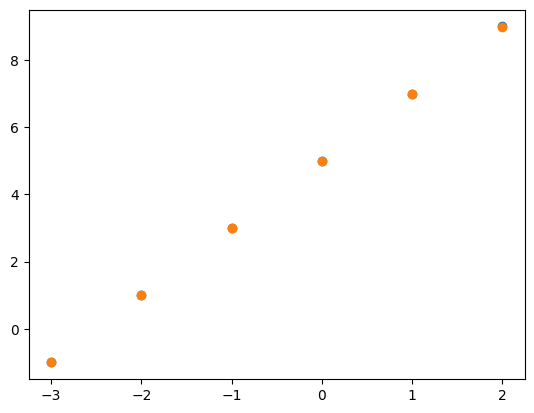

In [26]:
plt.scatter(X, y)
plt.scatter(X, ypred.detach())

In [81]:
torch.manual_seed(1)

W = torch.randn((1, 2), requires_grad=True)
w1 = torch.randn((2, 1), requires_grad=True)
b = torch.randn((1, 2), requires_grad=True)
b1 = torch.randn((2, 1), requires_grad=True)
parameters = [W, b, w1, b1]

In [83]:
x = (X.view(-1, 1).float() @ W) + b
x = x @ w1
x

tensor([[-0.7510],
        [-0.5444],
        [-0.3377],
        [-0.1311],
        [ 0.0755],
        [ 0.2822]], grad_fn=<MmBackward0>)

In [24]:
for _ in range(10):
    ypred = X*W + b
    loss = (y - ypred)**2
    loss = loss.mean()

    for p in parameters:
        p.grad = None

    loss.backward() 
    for p in parameters:
        p.data = p.data - (p.grad  * 0.1)

print(loss.item())

4.9003047024598345e-06


In [104]:
X = torch.tensor(1).view(-1, 1)
W = torch.tensor([2, 3]).view(1, -1)
(X @ W)

tensor([[2, 3]])

In [157]:
import torch.nn as nn
torch.manual_seed(1)

linear = nn.Linear(1, 1, bias=False)
linear(X.float())

tensor([[0.5153]], grad_fn=<MmBackward0>)

In [167]:
sq = nn.Sequential(
    nn.Linear(1, 2, bias=True),
    nn.Linear(2, 1, bias=False)
)

list(sq.parameters())

[Parameter containing:
 tensor([[ 0.5426],
         [-0.2431]], requires_grad=True),
 Parameter containing:
 tensor([0.9960, 0.8016], requires_grad=True),
 Parameter containing:
 tensor([[-0.0331, -0.4720]], requires_grad=True)]

In [ ]:
torch.randn()

In [202]:
torch.manual_seed(1)
W1 = torch.randn(1, 2)
b = torch.tensor([1, 2])
W2 = torch.randn(2, 1)
print(W1 + b)
W1, b

tensor([[1.6614, 2.2669]])


(tensor([[0.6614, 0.2669]]), tensor([1, 2]))

In [159]:
list(linear.parameters())

[Parameter containing:
 tensor([[0.5153]], requires_grad=True)]

In [156]:
ranW = torch.randn((1, 2))
print(ranW.size(), X.size())

X.float() @ ranW

torch.Size([1, 2]) torch.Size([1, 1])


tensor([[0.0393, 0.9262]])

In [145]:
X.float() @ ranW.t()

tensor([[-0.5404, -2.2102]])

In [208]:
list(nn.Conv2d(3, 10, 2).parameters())

[Parameter containing:
 tensor([[[[-0.2674,  0.0535],
           [-0.0184,  0.1043]],
 
          [[-0.1468, -0.2061],
           [ 0.1968, -0.1389]],
 
          [[ 0.2031,  0.2341],
           [-0.2019, -0.1331]]],
 
 
         [[[ 0.0348, -0.2722],
           [ 0.0887, -0.1203]],
 
          [[-0.1280, -0.2232],
           [ 0.1350, -0.1840]],
 
          [[-0.2307, -0.0759],
           [-0.1607, -0.2806]]],
 
 
         [[[ 0.1163, -0.1098],
           [ 0.2022,  0.2032]],
 
          [[-0.1841, -0.1683],
           [-0.1025,  0.1691]],
 
          [[-0.0099, -0.1031],
           [ 0.1788,  0.2738]]],
 
 
         [[[ 0.2134, -0.2208],
           [-0.0600, -0.0554]],
 
          [[ 0.2464, -0.1493],
           [-0.1654,  0.0045]],
 
          [[-0.0671,  0.1093],
           [ 0.0351, -0.1724]]],
 
 
         [[[ 0.2099,  0.1797],
           [ 0.0632, -0.2613]],
 
          [[ 0.1357,  0.1918],
           [ 0.0804, -0.1116]],
 
          [[ 0.0194, -0.1109],
           [ 0.2718,  0.

In [222]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

mnist_transform = transforms.ToTensor()

train_dataset = datasets.MNIST('data/', download=True, transform=mnist_transform)

train_loader = DataLoader(train_dataset, batch_size=32)
X, y = next(iter(train_loader))

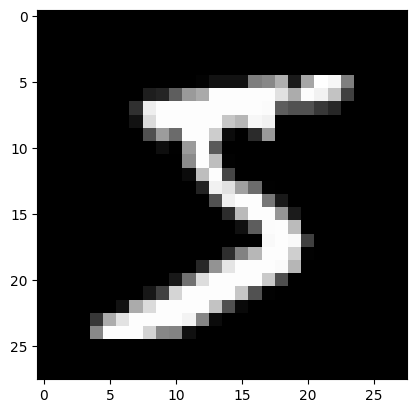

In [224]:
plt.imshow(X[0].view(28, 28, 1), cmap='gray')

In [228]:
torch.manual_seed(1)
cn = nn.Conv2d(1, 20, 5)
cn(X)

tensor([[[[-1.5883e-01, -1.5883e-01, -1.5883e-01,  ..., -1.5883e-01,
           -1.5883e-01, -1.5883e-01],
          [-1.5883e-01, -1.5883e-01, -1.5883e-01,  ..., -3.6701e-01,
           -2.9114e-01, -1.9593e-01],
          [-1.5883e-01, -1.5883e-01, -1.5883e-01,  ..., -3.2063e-01,
           -2.4911e-01, -1.8649e-01],
          ...,
          [-1.2878e-01, -3.0485e-02,  2.4484e-02,  ..., -1.5883e-01,
           -1.5883e-01, -1.5883e-01],
          [-1.7189e-01, -2.2539e-01, -2.0597e-01,  ..., -1.5883e-01,
           -1.5883e-01, -1.5883e-01],
          [-2.1250e-01, -2.7506e-01, -2.1320e-01,  ..., -1.5883e-01,
           -1.5883e-01, -1.5883e-01]],

         [[-1.6621e-01, -1.6621e-01, -1.6621e-01,  ..., -1.6621e-01,
           -1.6621e-01, -1.6621e-01],
          [-1.6621e-01, -1.6621e-01, -1.6621e-01,  ..., -1.3695e-01,
           -1.1951e-01, -1.1501e-01],
          [-1.6621e-01, -1.6621e-01, -1.6621e-01,  ...,  5.3905e-02,
            3.3699e-02, -4.2674e-02],
          ...,
     